# IA651 Final Project

## Project Description
This is the final project for the course ia651 (Applied Machine Learning) of Clarkson University (Spring 2023). The goal for the final project is to select an appropriate private or public dataset and build a predictive model for it. Data cleaning, exploration and preparing should be done to prepare the data to build the prediction model. 

For the selected Airbnb dataset start with being familiar with dataset, cleaning dataset, exploring and explaining, finding relations and building model and doing prediction. 

## NYC Airbnb listing Dataset
Airbnb is an online marketplace that connects people who are looking for a place to stay with people who have extra space to rent out. It was founded in 2008 and has since grown into a global platform with listings in over 220 countries and regions. On Airbnb, hosts can list their homes, apartments, guesthouses, or other types of accommodations, and travelers can search for and book these spaces for short-term stays. Airbnb also offers experiences and activities hosted by local experts in various locations, allowing travelers to immerse themselves in the culture and community of their destination.

The Airbnb NYC listing dataset is a collection of information about listings in New York City that are available on the Airbnb platform. It contains information such as the location, type of accommodation, price, number of bedrooms, amenities, availability, and reviews from guests. The dataset was first released in 2015 and has been updated annually since then.

The dataset is publicly available and has been used by researchers to analyze various aspects of the Airbnb market in New York City. For example, researchers have used the dataset to study the impact of Airbnb on the housing market, the distribution of listings across neighborhoods, and the characteristics of hosts and guests. The dataset includes information on over 50,000 listings in New York City, making it one of the largest Airbnb datasets available.

## Resources
**Dataset** : [NYC Airbnb 2023](http://insideairbnb.com/get-the-data)

**Python Version** : 3.11

**Packages**: Numpy, Pandas, Keras, Matplotlib, Scikit, Seaborn

**IDE** : Visual Studio Code, Jupyter Notebook


## Dataset features

List of the important features which we will use in this project.

* **id**: A unique identifier for each Airbnb listing.
* **name**: The name or title of the Airbnb listing.
* **host_id**: A unique identifier for the host of the Airbnb listing.
* **host_name**: The name of the host of the Airbnb listing.
* **neighbourhood_group**: The borough (i.e. neighborhood group) in which the Airbnb listing is located.
* **neighbourhood**: The specific neighborhood in which the Airbnb listing is located.
* **latitude**: The latitude coordinate of the Airbnb listing's location.
* **longitude**: The longitude coordinate of the Airbnb listing's location.
* **room_type**: The type of room or space that is being rented (e.g. Entire home/apt, Private room, Shared room).
* **price**: The nightly price for the Airbnb listing.
* **minimum_nights**: The minimum number of nights that a renter must stay in the Airbnb listing.
* **number_of_reviews**: The number of reviews that the Airbnb listing has received.
* **last_review**: The date of the most recent review of the Airbnb listing.
* **reviews_per_month**: The average number of reviews per month for the Airbnb listing.
* **availability_365**: The number of days that the Airbnb listing is available for rent during the next 365 days.

* **amenities**: List of amenities reported by the host.
* **bedrooms**: number of bedrooms available for use.
* **beds**: number of beds.
* **bathrooms**: number of bathrooms available for use.
* **accommodates**: number of people who can use the listing

## Data cleaning

The first step is to know the dataset itself and it's general status. 

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/listings.csv')
df.shape

(42931, 75)

the result shows the dimension of our data. Among 75 feature we use ones we described before

In [3]:
df = df[['id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'minimum_nights', 'maximum_nights']]

before everything is better to check the status of nulls in our dataset:

In [4]:
#summarize of null cells:
df.isnull().sum()

id                                  0
host_since                          5
host_response_rate              14532
host_acceptance_rate            12564
host_is_superhost                  25
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms                       42931
bedrooms                         3874
beds                              929
amenities                           0
price                               0
availability_365                    0
number_of_reviews                   0
review_scores_rating            10304
reviews_per_month               10304
minimum_nights                      0
maximum_nights                      0
dtype: int64

the **bathrooms** feature is most of the times null so it's better to drop it:

In [5]:
df = df.drop(['bathrooms'], axis = 1)

Then we check to see is there any duplicate data or not:

In [6]:
# Check for duplicates
print(df.duplicated().sum())

0


To know more about the features lets check the data types:

In [7]:
df.dtypes

id                                int64
host_since                       object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
reviews_per_month               float64
minimum_nights                    int64
maximum_nights                    int64
dtype: object

Features **host_response_rate**, **host_acceptance_rate**, **host_is_superhost** and **price** should be numbers. Here we convert them to numbers:             

In [8]:
# Replacing the '$' sign with an empty string in the 'price' column
df['price'] = df['price'].str.replace('$', '')

# Removing commas from the 'price' column
df['price'] = df['price'].str.replace(',', '')

# Converting the 'price' column to float
df['price'] = df['price'].astype(float)

In [9]:
# Replacing the '%' sign with an empty string in the 'host_response_rate' column
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

# Converting the 'host_response_rate' column to float
df['host_response_rate'] = df['host_response_rate'].astype(float)

In [10]:
# Replacing the '%' sign with an empty string in the 'host_acceptance_rate' column
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')

# Converting the 'host_response_rate' column to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

fo the **host_is_superhost** column the data is in the format of t(true) and f(false). we replace them with 0 for flase and 1 for true:

In [266]:
#Replacing t with 1 and f with 0
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

#converting data to float format
#Here we converte data to float becuase we want to do nothing with null values
df['host_is_superhost'] = df['host_is_superhost'].astype(float) 

The last feature which needs some action is **host_since** column. This column shows the listing joining time to Airbnb but in the object data type. Here we convert it to datetime format:

In [267]:
df['host_since'] = pd.to_datetime(df['host_since'])

- **Amenities** :

this table can help us to know more about the listing. Let's see how many different types of amenities we have in this datatset:

In [268]:
import re

unique_amenities = set()

for index, row in df.iterrows():
    amenities_list = re.findall('"([^"]*)"', row['amenities'])
    # add each amenity to the unique_amenities set
    for amenity in amenities_list:
        unique_amenities.add(amenity)

print('the number of unique amenities by name: ', len(unique_amenities))

the number of unique amenities by name:  5465


There are 5465 different amenities name in the column and if we chack them most of them are duplicated. With some tries we created a standardized dictionary which has the key words for the strings that present similar amenity.

for example the key word wifi is replaced with diffrent presentation of wifi in amenities.

In [269]:
#dictionary of standardized amenities
standardized_amenities = {
    'wifi': 'Wifi',
    'tv': 'TV',
    'cable tv': 'TV',
    'oven': 'Oven',
    'gas oven': 'Oven',
    'stove': 'Stove',
    'gas stove': 'Stove',
    'conditioner': 'Conditioner',
    'shampoo' : 'Shampoo',
    'soap' : 'Soap',
    'sound system': 'Sound system',
    'refrigerator' : 'Refrigerator',
    'pool': 'pool',
    'pool' : 'pool',
    'bbq' : 'BBQ',
    'book': 'Book',
    'coffee': 'Coffee',
    'clothing': 'Clothing',
    'exercise equipment' : 'Exercise equipment',
    'game' : 'Game', 
    'fireplace' : 'Fireplace',
    'parking' : 'Parking',
    'garage' : 'Garage',
    'crib' : 'Crib',
    'dryer' : 'Dryer',
    'washer' : 'Washer',
    'backyard' : 'Backyard',
    'gym' : 'Gym',
    'ev charger' : 'EV Cahrger',
    'hot tub' : 'Hot-Tube',
    'high chair' : 'High chair',
    'carport' : 'Carport',
    'baby bath' : 'Baby bath',
    'baby monitor' : 'Baby monitor',
    'beach access' : 'Beach access',
    'changing table' : 'changing table',
    
    
}


unique_amenities = set()


for index, row in df.iterrows():
    amenities_list = re.findall('"([^"]*)"', row['amenities'])
    # standardize the amenities
    standardized_list = []
    for amenity in amenities_list:
        amenity_lower = amenity.lower()
        for key, value in standardized_amenities.items():
            if key in amenity_lower:
                standardized_list.append(value)
                break
        else:
            standardized_list.append(amenity)
        standardized_list = [amenity for amenity in standardized_list if not amenity.endswith('\\')]
        standardized_list = [amenity for amenity in standardized_list if not amenity.endswith(', ')]
    # add each standardized amenity to the unique_amenities set
    for amenity in standardized_list:
        unique_amenities.add(amenity)


print('The number of unique amenities after standardizing them: ', len(unique_amenities))

The number of unique amenities after standardizing them:  212


Let's see what are the unique amenities which we found:

In [270]:
print(unique_amenities)

{'Long term stays allowed', 'Vineyard view', 'Concierge', 'Onsite restaurant \\u2014 Trademark Taste', 'Book', 'Bed sheets and pillows', 'Onsite restaurant \\u2014 The Press Lounge', 'Outlet covers', 'Housekeeping', 'Ping pong table', 'Onsite restaurant \\u2014 CanteenM-open 24/7', 'Kitchenette', 'Single level home', 'Wifi', 'Refrigerator', 'Exercise equipment', 'Baby monitor', 'Bathtub', 'Marina view', 'Kayak', 'Outdoor dining area', 'Essentials', 'Shared outdoor kitchen', 'Fire extinguisher', 'Waterfront', 'Central air conditioning', 'Mini fridge', 'Smoke alarm', 'Clothing', 'River view', 'Children\\u2019s dinnerware', 'Complimentary breakfast', 'TV', 'Microwave', 'changing table', 'Private outdoor kitchen', 'Radiant heating', 'Slippers', 'Bikes', 'C.O. Bigelow Apothecary toiletries', 'Private sauna', 'Mountain view', 'Onsite rooftop bar \\u2014 Mykonos Bleu Restaurant & Rooftop', 'Park view', 'Onsite restaurant \\u2014 Mykonos Bleu Restaurant & Rooftop', 'Game', 'Shared sauna', 'Sou

We hot encode the amenities and add them to our dataframe:

In [271]:
# creating one-hot encoded columns for each unique amenity
for amenity in unique_amenities:
    df[amenity] = df['amenities'].str.contains(amenity).astype(int)

# droping the original amenities column
df.drop('amenities', axis=1, inplace=True)

df.head(3)

,id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,...,Breakfast available for a fee,Onsite bar \u2014 Overstory,Onsite restaurant \u2014 Blue Ribbon,ReVolve toiletries,House bikes,Heating,BBQ,Beach view,Rice maker,Patio or balcony
0,801749842377802394,2023-01-10,NaN,NaN,0.0,Canarsie,Brooklyn,40.640403,-73.888535,Private room,...,0,0,0,0,0,0,0,0,0,0
1,765948794133787266,2022-11-22,100.0,100.0,0.0,Canarsie,Brooklyn,40.648510,-73.894330,Private room,...,0,0,0,0,0,0,0,0,0,0
2,636274456676328779,2022-05-27,NaN,NaN,0.0,Tottenville,Staten Island,40.507114,-74.251907,Entire home/apt,...,0,0,0,0,0,0,1,0,0,0


## Data exploration

After cleaning and preparing the dataset in this part we try to explore the data and features.

First we focus on **numerical features**: 

**1- Price**

We start with the most important feature for us (price), since we want to build a model for price prediction:

In [272]:
# Exploring the 'price' column
print(df['price'].describe())

count    42931.000000
mean       200.307167
std        895.082911
min          0.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      99000.000000
Name: price, dtype: float64


the result shows some outliers. There are some listings with zero prices and some others with very high value for prices. We consider these records as outliers. Let's check how many records we have with '0' value for price:

In [273]:
df[df['price'] == 0].shape

(27, 232)

Just 27 records. We drop these records:

In [274]:
df = df[df['price'] > 0]

Here we want to find the listings with prices more than 2000$:

<AxesSubplot:>

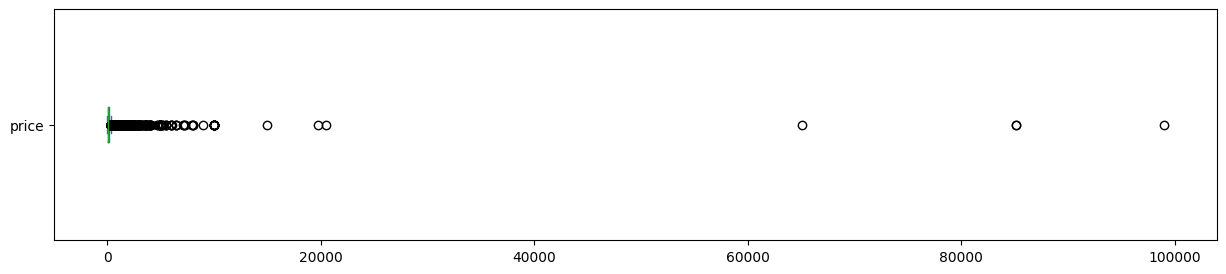

Values over $2000.00: 
175
0.4079%


In [275]:
import matplotlib.pyplot as plt


# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to  500.00
print('Values over $2000.00: ')
print(len(df[df['price'] > 2000]))
print('{:.4f}%'.format((len(df[df['price'] > 2000]) / df.shape[0]) * 100))

Seems 2000$ is a good choice to drop listings with higher prices:

In [276]:
df = df[(df['price'] <= 2000)].reset_index()

**2- minimum_nights**

Let's see see the description for **minimum_nights** column:

In [277]:
print(df['minimum_nights'].describe())

count    42729.000000
mean        18.117461
std         27.381428
min          1.000000
25%          2.000000
50%          8.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64


maximum value seems a bit strange here we plot boxplot for the minimum_nights column:

<AxesSubplot:>

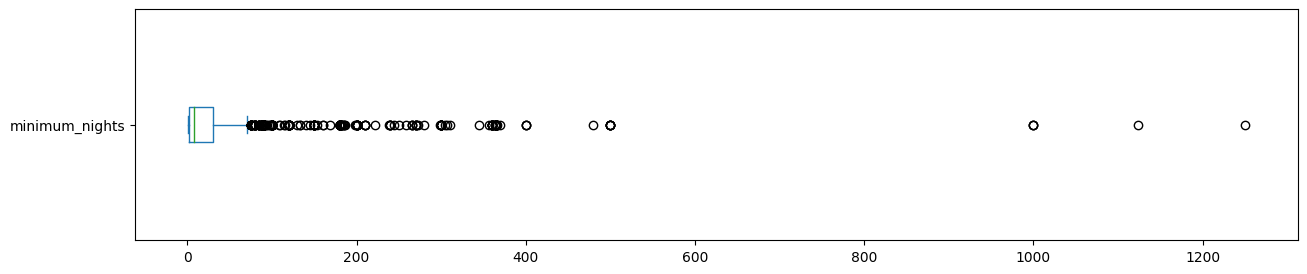

In [278]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Seems we can consider more than 400 nights as outliers. Let's check how many samples are bigger than 400:

In [279]:
print('records with minimum nights over 400: ')
print(len(df[df['minimum_nights'] > 400]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 400]) / df.shape[0]) * 100))

records with minimum nights over 400: 
12
0.0281%


just 12 records. Then, we remove them from the dataframe:

In [280]:
df = df[(df['minimum_nights'] <= 400)].reset_index()

let's plot the histogram chart for minimum_nights to know more about the distribution of data:

array([[<AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

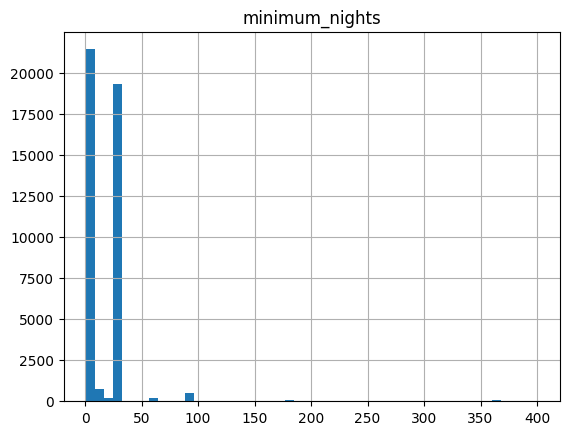

In [281]:
df.hist(column='minimum_nights', bins=50)

We can see that there are some specific number of nights with much more accurance than others. Let's see what are this values:

In [282]:
df['minimum_nights'].value_counts()

30     18182
1       7846
2       5507
3       3805
5       1496
       ...  
345        1
92         1
98         1
140        1
244        1
Name: minimum_nights, Length: 122, dtype: int64

The minimum_nights = 30 has the most occurance and after than 1 nights. Let's aagin check how many records there are with minimum_nights more than 30 nights:

In [283]:
print('records with minimum nights over 30: ')
print(len(df[df['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0]) * 100))

records with minimum nights over 30: 
1866
4.3683%


about 5% of listings. Let's keep these records maybe later we need them.

**3- maximum_nights**

The column description:

In [284]:
print(df['maximum_nights'].describe())

count    4.271700e+04
mean     5.177731e+04
std      1.039123e+07
min      1.000000e+00
25%      6.000000e+01
50%      3.650000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64


Some big and strange values exist. Let's see what is the 99 percentile of maximum_nights column:

In [285]:
percentile_99 = df['maximum_nights'].quantile(0.99)
print('99th percentile for maximum_nights column is: ', percentile_99)

99th percentile for maximum_nights column is:  1125.0


Let's drop records with maximum_nights more than 1125:

In [286]:
df = df[(df['maximum_nights'] <= percentile_99)]

poxplot for maximum_nights:

<AxesSubplot:>

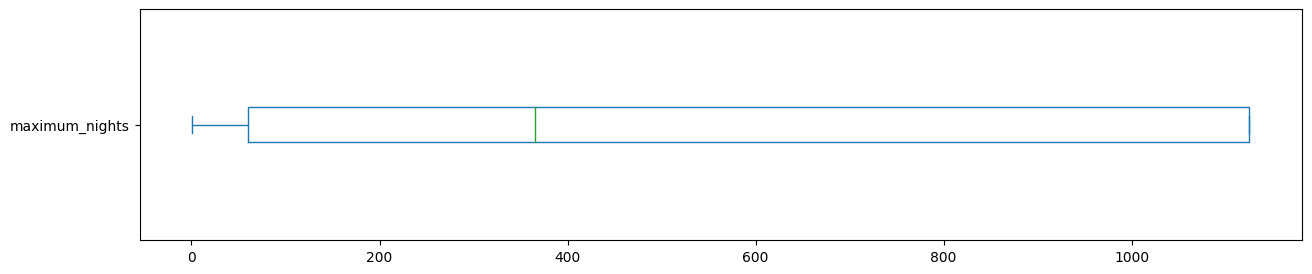

In [287]:
df['maximum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Let's try to show the data in a different way to know more about maximum_nights:

array([[<AxesSubplot:title={'center':'maximum_nights'}>]], dtype=object)

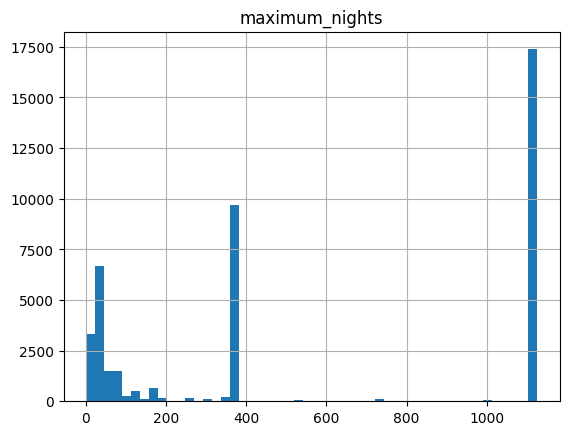

In [288]:
df.hist(column='maximum_nights', bins=50)

similar to the minimum_nights column here we have some values which repeated far more than others. Let's see what are they:

In [289]:
df['maximum_nights'].value_counts()

1125    17211
365      9550
30       2585
28       1615
90       1329
        ...  
238         1
173         1
1114        1
107         1
244         1
Name: maximum_nights, Length: 245, dtype: int64

Seems 1125 is a default maximum value that some listings using this number and it has the most occurance. After that, one year,one month and three monthes have the most occurances.

It's good to know how many listings allow the people to stay just one day:

In [290]:
print('Number of listings with maximum night eqaul to 1: ', df['maximum_nights'].value_counts()[1])

Number of listings with maximum night eqaul to 1:  52


**3- availability_365**

column description:

In [291]:
print(df['availability_365'].describe())

count    42705.000000
mean       140.112750
std        141.918569
min          0.000000
25%          0.000000
50%         88.000000
75%        288.000000
max        365.000000
Name: availability_365, dtype: float64


There are some listings with zero availability. Let's see how many records they are:

In [292]:
print('Number of listings with zero availability: ', df['availability_365'].value_counts()[0] )

Number of listings with zero availability:  13912


It's better to keep these listings.

**4- Latitude**:

Description for the column:

In [293]:
print(df['latitude'].describe())

count    42705.000000
mean        40.728244
std          0.057697
min         40.500314
25%         40.687420
50%         40.723945
75%         40.762295
max         40.911380
Name: latitude, dtype: float64


records are normal with a small standard deviation.

**5- longitude:**

Description for the column:

In [294]:
print(df['longitude'].describe())

count    42705.000000
mean       -73.943504
std          0.056639
min        -74.251907
25%        -73.981620
50%        -73.952500
75%        -73.923880
max        -73.710870
Name: longitude, dtype: float64


for the longitude column similar the the latitude column records are normal. Let's plot latitude-longitude chart:

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'longitude')

Text(0, 0.5, 'Latitude')

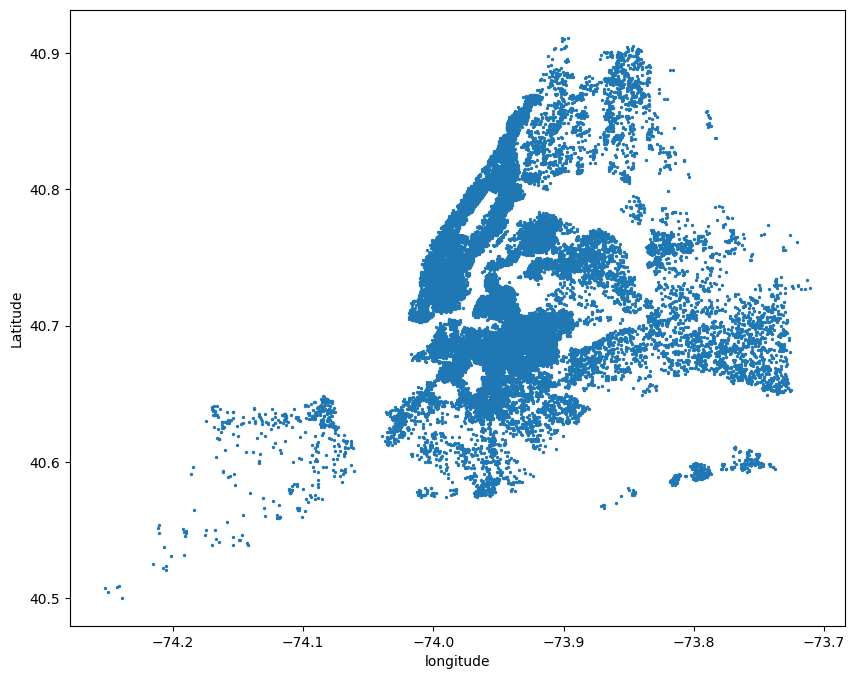

In [296]:
plt.figure(figsize=(10,8))
plt.scatter(df['longitude'],df['latitude'], s = 2) # s is a size of marker
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.show()

**6- host_response_rate**

The description for the column:

In [297]:
print(df['host_response_rate'].describe())

count    28262.000000
mean        94.432524
std         16.070011
min          0.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64


the distribution for the column:

array([[<AxesSubplot:title={'center':'host_response_rate'}>]],
      dtype=object)

100.0    20692
90.0       869
99.0       772
94.0       519
98.0       499
         ...  
55.0         2
24.0         1
61.0         1
36.0         1
5.0          1
Name: host_response_rate, Length: 73, dtype: int64

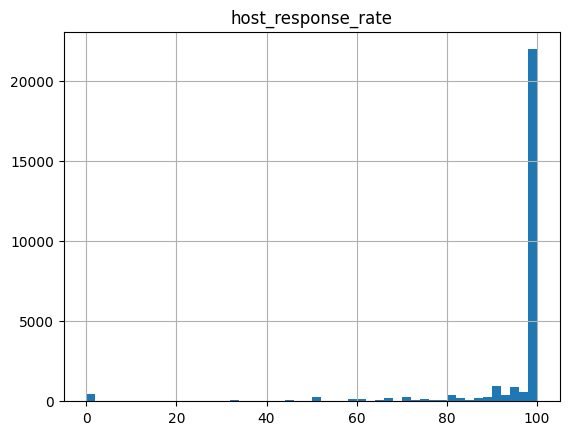

In [300]:
df.hist(column='host_response_rate', bins=50)
df['host_response_rate'].value_counts()

Let's see how many hosts do not response to the requests at all:

In [311]:
print('Number of listings with zero host_response_rate: ', df['host_response_rate'].value_counts()[0] )

Number of listings with zero host_response_rate:  428


**7- host_acceptance_rate:**

Here is the description for the column:

In [315]:
print(df['host_acceptance_rate'].describe())

count    30227.000000
mean        83.640851
std         25.279805
min          0.000000
25%         78.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: host_acceptance_rate, dtype: float64


The distribution for the column:

array([[<AxesSubplot:title={'center':'host_acceptance_rate'}>]],
      dtype=object)

100.0    9661
99.0     1970
97.0     1746
98.0     1322
0.0       897
         ... 
15.0        7
4.0         6
7.0         4
26.0        4
6.0         1
Name: host_acceptance_rate, Length: 98, dtype: int64

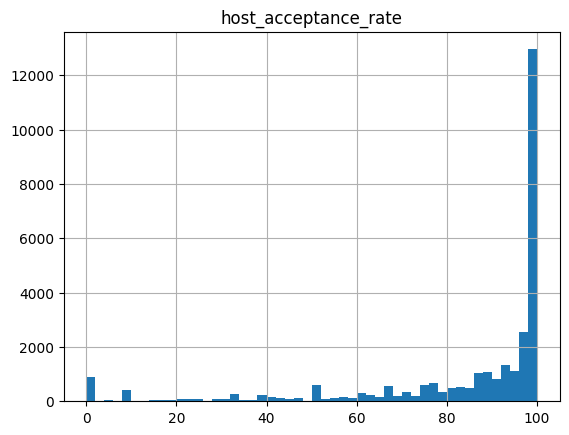

In [316]:
df.hist(column='host_acceptance_rate', bins=50)
df['host_acceptance_rate'].value_counts()

The number and percentage of rejecting reuqests:

In [317]:
print('number of records with acceptance rate equal to zero: ')
print(len(df[df['host_acceptance_rate'] == 0]))
print('{:.4f}%'.format((len(df[df['host_acceptance_rate'] == 0]) / df.shape[0]) * 100))

number of records with acceptance rate equal to zero: 
897
2.1005%


**8- bedrooms:**

The description for bedrooms:

In [318]:
print(df['bedrooms'].describe())

count    38876.000000
mean         1.393971
std          0.781390
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: bedrooms, dtype: float64


Distribution of number of bedrooms:

array([[<AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

1.0     28665
2.0      6535
3.0      2655
4.0       756
5.0       178
6.0        64
7.0         9
8.0         6
9.0         5
11.0        2
16.0        1
Name: bedrooms, dtype: int64

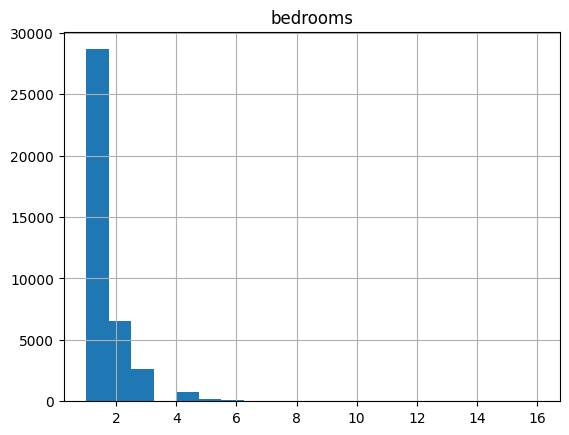

In [319]:
df.hist(column='bedrooms', bins=20)
df['bedrooms'].value_counts()

The number of listings which have more than 3 bedrooms:

In [320]:
print(len(df[df['bedrooms'] > 3]))
print('{:.4f}%'.format((len(df[df['bedrooms'] > 3]) / df.shape[0]) * 100))

1021
2.3908%


Since we want to predict price, we consider more than 3 bedrooms as outliers for our dataset and remove them:

In [321]:
df = df[(df['bedrooms'] < 4)]

**9- beds:**

Description for the column:

In [325]:
print(df['beds'].describe())

count    37096.000000
mean         1.606211
std          0.987283
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: beds, dtype: float64


The distribution for the number of beds:

array([[<AxesSubplot:title={'center':'beds'}>]], dtype=object)

1.0     23220
2.0      8404
3.0      3481
4.0      1313
5.0       369
6.0       220
7.0        46
8.0        23
9.0        14
11.0        4
10.0        2
Name: beds, dtype: int64

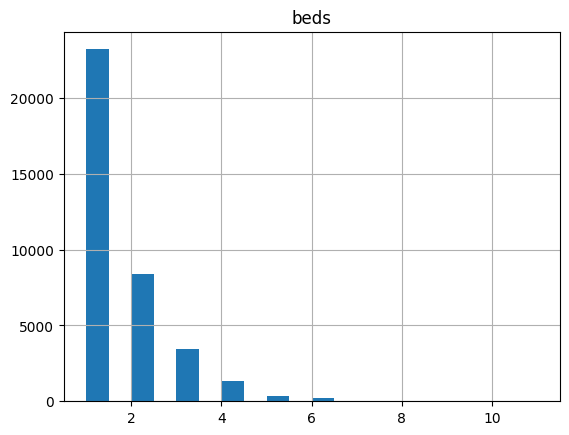

In [324]:
df.hist(column='beds', bins=20)
df['beds'].value_counts()

We consider more than 6 beds as outliers and remove them from the dataset:

In [326]:
df = df[(df['beds'] < 7)]

**10- accomodates:**

The description for the column:

In [336]:
print(df['beds'].describe())

count    37007.000000
mean         1.591267
std          0.938749
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: beds, dtype: float64


everything seems clear for this column.

#### Numberical features relations:

Here we try to fidn relations and correlations between the numerical features for our cleanded dataset.

The correlation matrix:

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

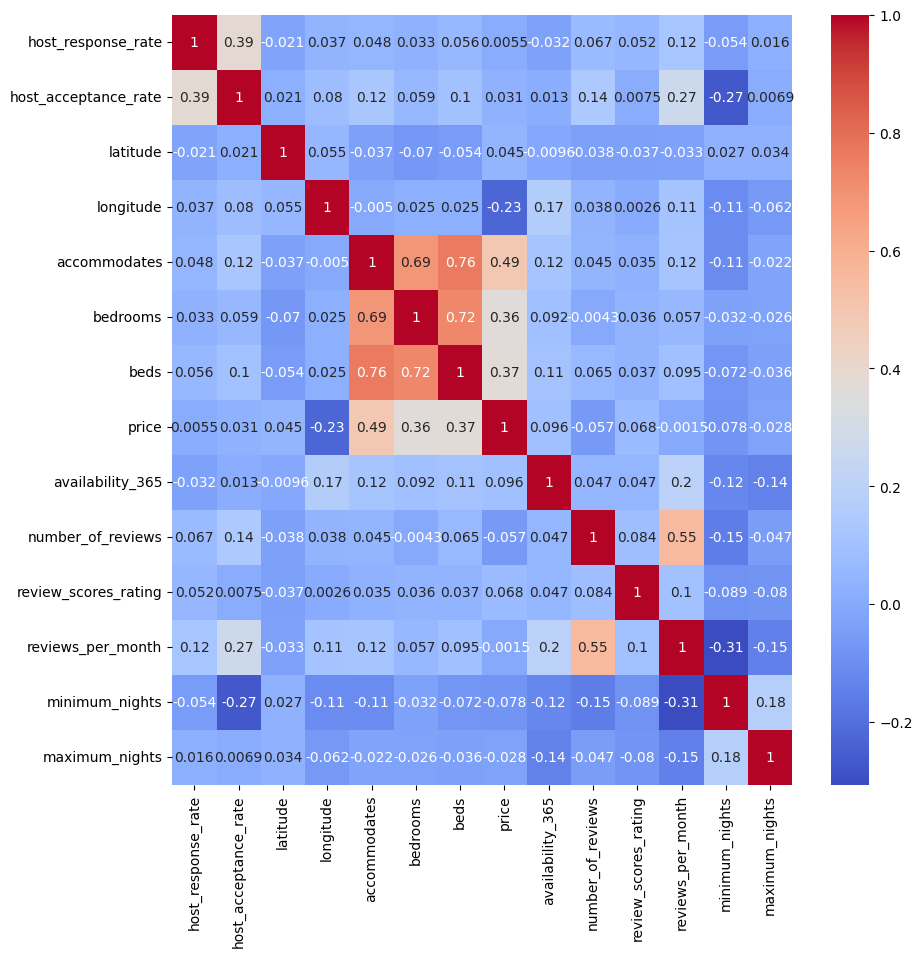

In [335]:
import seaborn as sns

corr = df[['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'minimum_nights', 'maximum_nights']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

The correlation matrix shows some sort of correlation for price with bedrooms, beds and accomodates columns (since accomodates, beds, and bedrooms are highly correlated to ech other we can consider the accumulated effect of these colunms by using a cross-feature created by these columns). We will compare the effect of using/not using cross-feature on price prediction.

Before we start exploring categorical features we focus on the host_sice column:

Here is the distribution for host_since column:

array([[<AxesSubplot:title={'center':'host_since'}>]], dtype=object)

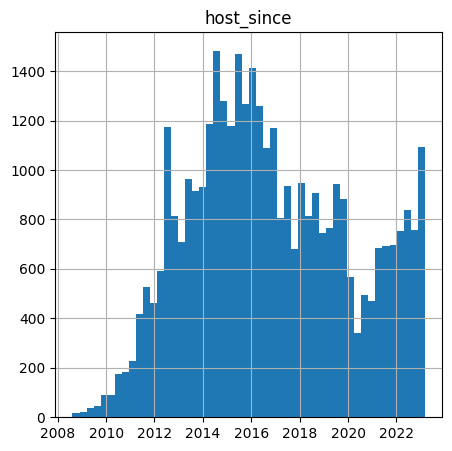

In [343]:
df.hist(column='host_since', bins=50, figsize=(5,5))
plt.show()


The above histogram plot shows the effect of Covid-19 Pandemic on the Aribnb new hosts. We can see by 2020 the number of registerations for Airbnb had decreased dramatically and again by ending the pandemic it increased to it's rate before pandemic value.

##### Categorical features exploring
**1- host_is_superhost**

Here is the pie chart to see the percentage of super hosts:

([<matplotlib.patches.Wedge at 0x1f522e24d48>,
 [Text(-0.8425154419821272, 0.7072253742772956, 'Not a superhost'),
  Text(0.8425154088745171, -0.7072254137182892, 'Superhost')],
 [Text(-0.45955387744479664, 0.385759295060343, '77.8%'),
  Text(0.4595538593861002, -0.38575931657361223, '22.2%')])

Text(0.5, 1.0, 'superhost/not superhost percentage')

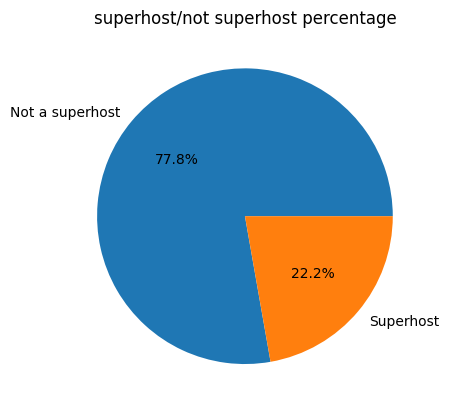

In [359]:
counts = df['host_is_superhost'].value_counts()

# creating a pie chart with the counts
plt.pie(counts, labels=['Not a superhost', 'Superhost'], autopct='%1.1f%%')

plt.title('superhost/not superhost percentage')

plt.show()

**2- room_type**

Let's see what room types there are in this dataset:

In [368]:
print(df['room_type'].value_counts())

Entire home/apt    19799
Private room       16512
Name: room_type, dtype: int64


*shared room* and *Hotel room* counts are too fewer than other two types. Seems we do not have eough records for these types of listings to have good model to predict the price for them. We want to remove them from dataset to just focus on the *Entire home/apt* and *Shared room* 

In [366]:
df = df[~df['room_type'].isin(['Shared room', 'Hotel room'])]

**3- neighbourhood_group_cleansed**

Here is the different neighbourhood groups (boroughs) distribution:

In [371]:
print(df['neighbourhood_group_cleansed'].value_counts())

Brooklyn         14357
Manhattan        13939
Queens            6144
Bronx             1500
Staten Island      371
Name: neighbourhood_group_cleansed, dtype: int64


We can see that for the *Staten Island* there are just 371 listings and this will make it hard to have a good prediction for prices for this borough. We keep this listings but we need to deal with this issue later.

Let's plot the location of different neibourhood groups:

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

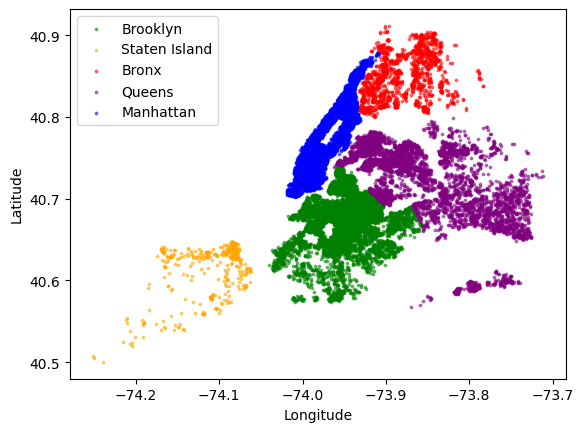

In [377]:
colors = {'Bronx': 'red', 'Brooklyn': 'green', 'Manhattan': 'blue', 'Queens': 'purple', 'Staten Island': 'orange'}
fig, ax = plt.subplots()
for neighborhood_group in df['neighbourhood_group_cleansed'].unique():
    ix = df['neighbourhood_group_cleansed'] == neighborhood_group
    ax.scatter(df.loc[ix, 'longitude'], df.loc[ix, 'latitude'], c=colors[neighborhood_group], label=neighborhood_group, alpha=0.5, s = 3)
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


*Here we try some other iteresting visualizations:*

* room_types for different neghbourhoods:

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

Text(0.5, 0, 'Neighborhood Group')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Percentage of Room Types by Neighborhood Group')

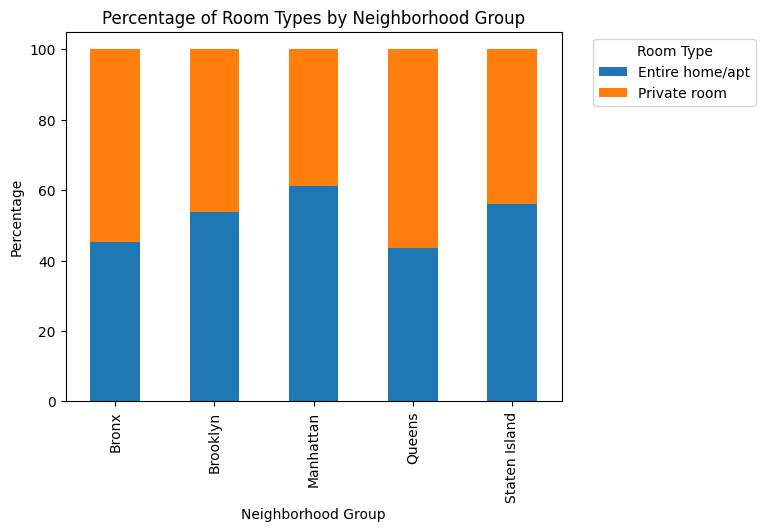

In [383]:
grouped = df.groupby(['neighbourhood_group_cleansed', 'room_type']).size().reset_index(name='counts')
pivoted = grouped.pivot(index='neighbourhood_group_cleansed', columns='room_type', values='counts')
total = pivoted.sum(axis=1)
percentages = pivoted.div(total, axis=0) * 100
percentages.plot(kind='bar', stacked=True)
plt.xlabel('Neighborhood Group')
plt.ylabel('Percentage')
plt.title('Percentage of Room Types by Neighborhood Group')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1))
plt.show()


* Accommodates vs neighbourhood group

Text(0.5, 0, 'Neighborhood Group')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Percentage of Number of Accommodates by Neighborhood Group')

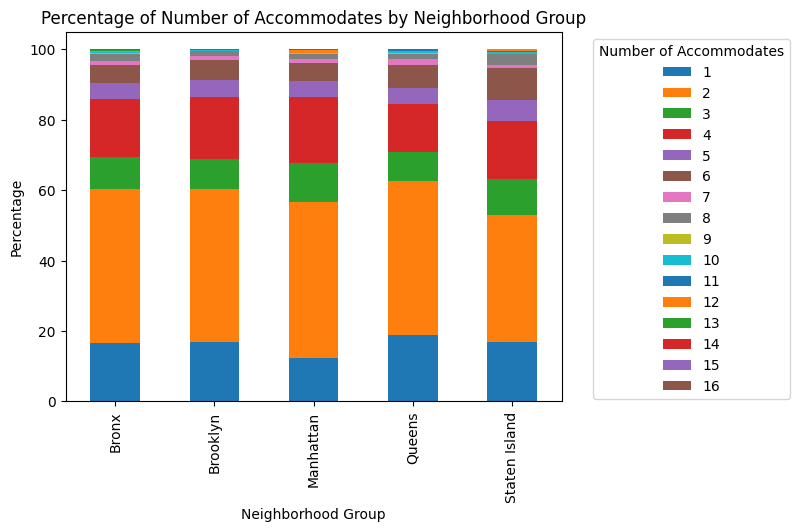

In [387]:
grouped = df.groupby(['neighbourhood_group_cleansed', 'accommodates']).size().reset_index(name='counts')

pivoted = grouped.pivot(index='neighbourhood_group_cleansed', columns='accommodates', values='counts')

total = pivoted.sum(axis=1)
percentages = pivoted.div(total, axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True)

ax.set_xlabel('Neighborhood Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Number of Accommodates by Neighborhood Group')
ax.legend(title='Number of Accommodates', bbox_to_anchor=(1.05, 1))

plt.show()

**4- neighbourhood_cleansed:**

First we want to know how many neighbourhoods we have in this listings and how many records we have for each of them:

In [388]:
print(df['neighbourhood_cleansed'].value_counts())

Bedford-Stuyvesant    2754
Williamsburg          2321
Harlem                1821
Bushwick              1614
Midtown               1458
                      ... 
Country Club             2
Richmondtown             2
Breezy Point             1
Lighthouse Hill          1
Neponsit                 1
Name: neighbourhood_cleansed, Length: 219, dtype: int64


Let's visualize these data:

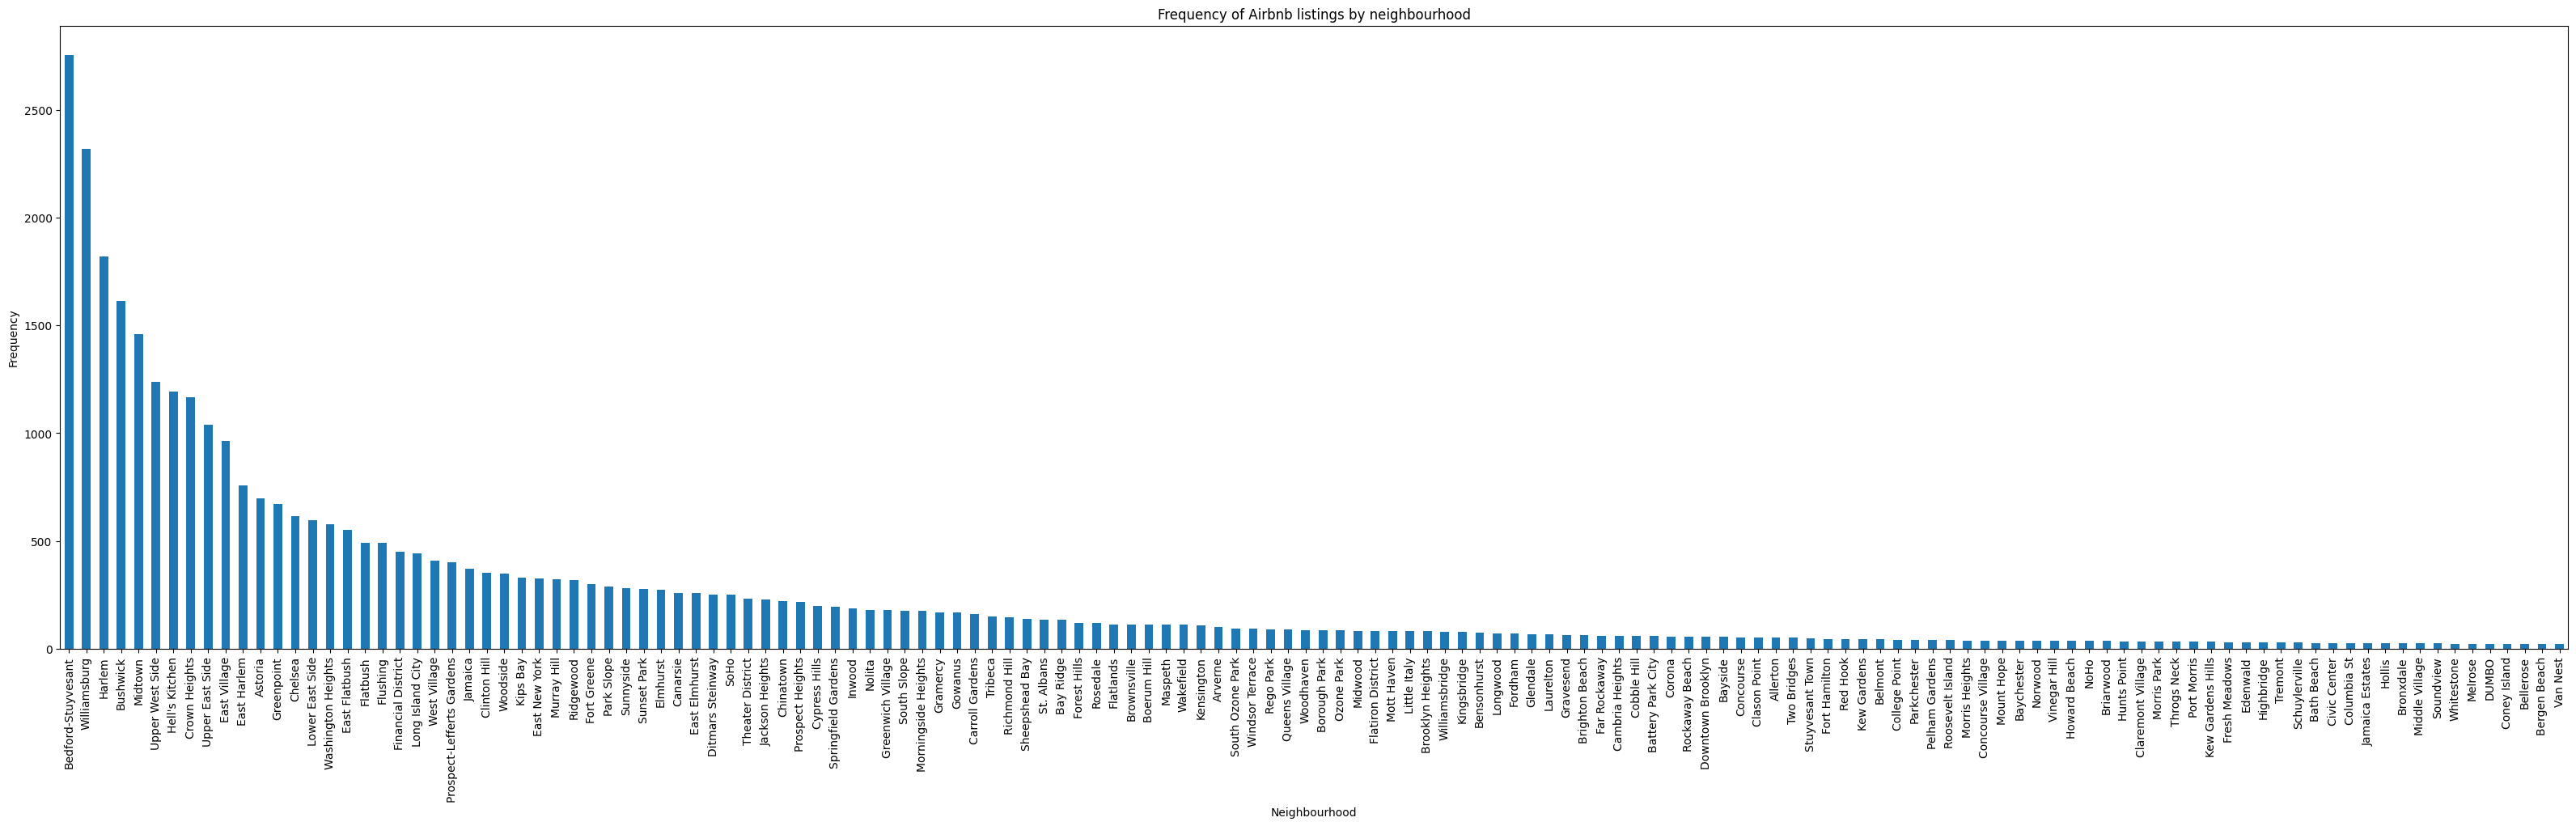

In [453]:
counts = df["neighbourhood_cleansed"].value_counts()


plt.figure(figsize=(40,10))
counts.plot.bar()

# set the plot title and axis labels
plt.title("Frequency of Airbnb listings by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Frequency")

# show the plot
plt.show();

There are many neighbourhoods with too few samples which are insufficient to build a good model for price prediction.

Let's see how many neighbourhoods there are with less than 20 listings:

In [408]:
counts = df.groupby('neighbourhood_cleansed').size()

# Filtering the groups to only include those with less than 20 records
less_than_20 = counts[counts < 20]

print(f"There are {len(less_than_20)} neighborhoods with less than 20 records.")
print(less_than_20.index.tolist())

There are 71 neighborhoods with less than 20 records.
['Arden Heights', 'Arrochar', 'Bay Terrace', 'Bayswater', 'Belle Harbor', 'Breezy Point', "Bull's Head", 'Castle Hill', 'Castleton Corners', 'Chelsea, Staten Island', 'City Island', 'Clifton', 'Co-op City', 'Concord', 'Country Club', 'Dongan Hills', 'Douglaston', 'Dyker Heights', 'East Morrisania', 'Eastchester', 'Edgemere', 'Eltingville', 'Emerson Hill', 'Fieldston', 'Gerritsen Beach', 'Graniteville', 'Grant City', 'Great Kills', 'Grymes Hill', 'Holliswood', 'Howland Hook', 'Huguenot', 'Jamaica Hills', 'Lighthouse Hill', 'Manhattan Beach', 'Marble Hill', 'Midland Beach', 'Mill Basin', 'Morrisania', 'Mount Eden', 'Navy Yard', 'Neponsit', 'New Brighton', 'New Dorp Beach', 'New Springville', 'North Riverdale', 'Oakwood', 'Olinville', 'Pelham Bay', 'Port Richmond', "Prince's Bay", 'Randall Manor', 'Richmondtown', 'Riverdale', 'Rosebank', 'Rossville', 'Sea Gate', 'Shore Acres', 'Silver Lake', 'South Beach', 'Spuyten Duyvil', 'Stapleton'

Here we try to know that for what neighbourhood groups these neighbourhoods belong:

In [412]:

counts = df.groupby(['neighbourhood_cleansed', 'neighbourhood_group_cleansed']).size()

# Filter the groups to only include those with less than 100 records
less_than_100 = counts[counts < 20]

# Count the number of neighborhoods with less than 100 records in each neighbourhood group
group_counts = less_than_100.groupby('neighbourhood_group_cleansed').size()

# Print the number of neighborhoods with less than 100 records in each neighbourhood group
print("Number of neighborhoods with less than 100 records in each neighbourhood group:")
print(group_counts)

Number of neighborhoods with less than 100 records in each neighbourhood group:
neighbourhood_group_cleansed
Bronx            19
Brooklyn          6
Manhattan         1
Queens            9
Staten Island    36
dtype: int64


Again here we can see that for Staten Island we do not have enough data for each neighbourhood.

We want to remove Staten Island listings from our dataset. Because, our final goal is to try to build a good model for price prediction and we need a well scattered dataset to have a good model.

In [414]:
df = df[df['neighbourhood_group_cleansed'] != 'Staten Island']

We also remove neighbourhoods with less that 20 listings in the dataset:

In [416]:
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

neighborhoods_to_remove = neighborhood_counts[neighborhood_counts < 20].index.tolist()

# Filter the DataFrame to exclude records for the specified neighborhoods
df = df[~df['neighbourhood_cleansed'].isin(neighborhoods_to_remove)]


**5- Amenities:**

Here are top 20 the most repeated amenities:

In [423]:
amenities_counts = df[unique_amenities].sum()
amenities_series = amenities_counts.sort_values(ascending=False)
print(amenities_series.head(20))



Wifi                     32854
Smoke alarm              32029
Kitchen                  31932
Essentials               29398
Carbon monoxide alarm    27352
TV                       27286
Hangers                  25517
Heating                  25051
Hot water                23255
Air conditioning         23053
Iron                     22265
Dishes and silverware    20240
Shampoo                  20046
Refrigerator             19743
Cooking basics           18393
Bed linens               17594
Coffee                   17435
Microwave                17296
Fire extinguisher        16168
Dedicated workspace      14996
dtype: int64


Let's see what is the distribution of these common aqmenities between different room_types:

In [432]:
common_amenities = list(df[unique_amenities].sum().sort_values(ascending=False).head(20).index)

# Create a new DataFrame with the common amenities and room type
common_amenities_df = pd.concat([df[common_amenities], df['room_type']], axis=1)

freq_df = common_amenities_df.groupby('room_type').sum()

print(freq_df)

                  Wifi  Smoke alarm  Kitchen  Essentials  \
room_type                                                  
Entire home/apt  17890        17903    18446       16951   
Private room     14964        14126    13486       12447   

                 Carbon monoxide alarm     TV  Hangers  Heating  Hot water  \
room_type                                                                    
Entire home/apt                  15565  16885    14390    13275      13640   
Private room                     11787  10401    11127    11776       9615   

                 Air conditioning   Iron  Dishes and silverware  Shampoo  \
room_type                                                                  
Entire home/apt             12884  13373                  12721    11845   
Private room                10169   8892                   7519     8201   

                 Refrigerator  Cooking basics  Bed linens  Coffee  Microwave  \
room_type                                                    

## Price Analyzing

In this part we try to find the effect of different features on the listings' prices.

In the data exploring part we found a positive correlation between price and features: accomodates, beds and bedrooms. In this section we focus on relation of categorical variables and listing's prices:

* neighbourhood_group Vs price:

Here we plot median of price for different neibourhood_groups:


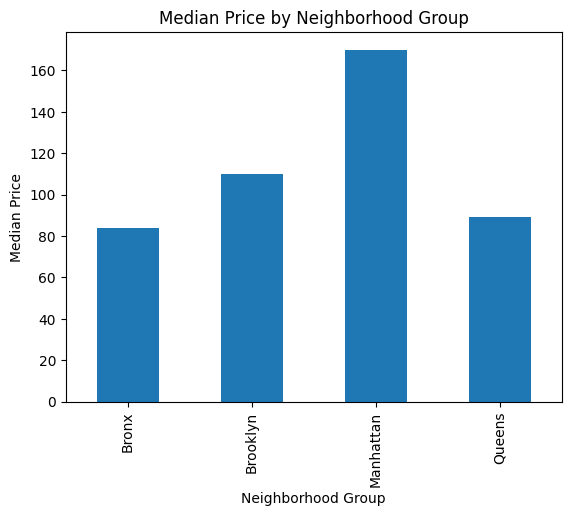

In [452]:
median_prices = df.groupby('neighbourhood_group_cleansed')['price'].median()

median_prices.plot(kind='bar')
plt.title('Median Price by Neighborhood Group');
plt.xlabel('Neighborhood Group');
plt.ylabel('Median Price');
plt.show();

Easily and as we expect Manhattan has more expensive listings.

Let's consider room_type and neighbourhood together:

Text(0.5, 1.0, 'Price by Neighborhood and Room Type')

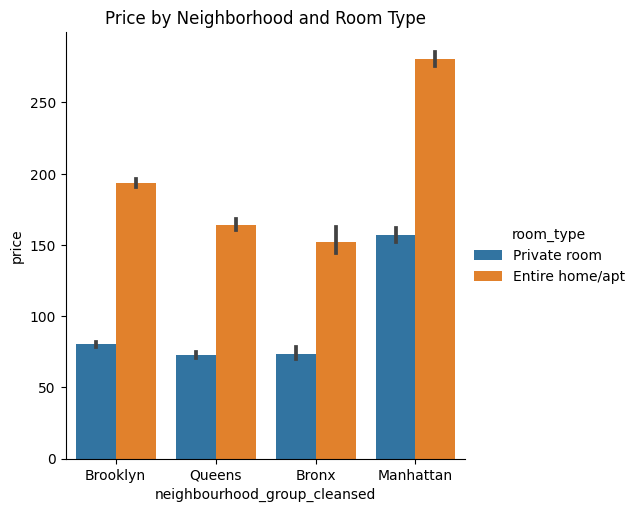

In [438]:
sns.catplot(x="neighbourhood_group_cleansed", y="price", hue="room_type", kind="bar", data=df)
plt.title("Price by Neighborhood and Room Type")
plt.show()

Here plot median price per neighbourhood and define the groups for better vidualization:

<Figure size 1200x800 with 0 Axes>

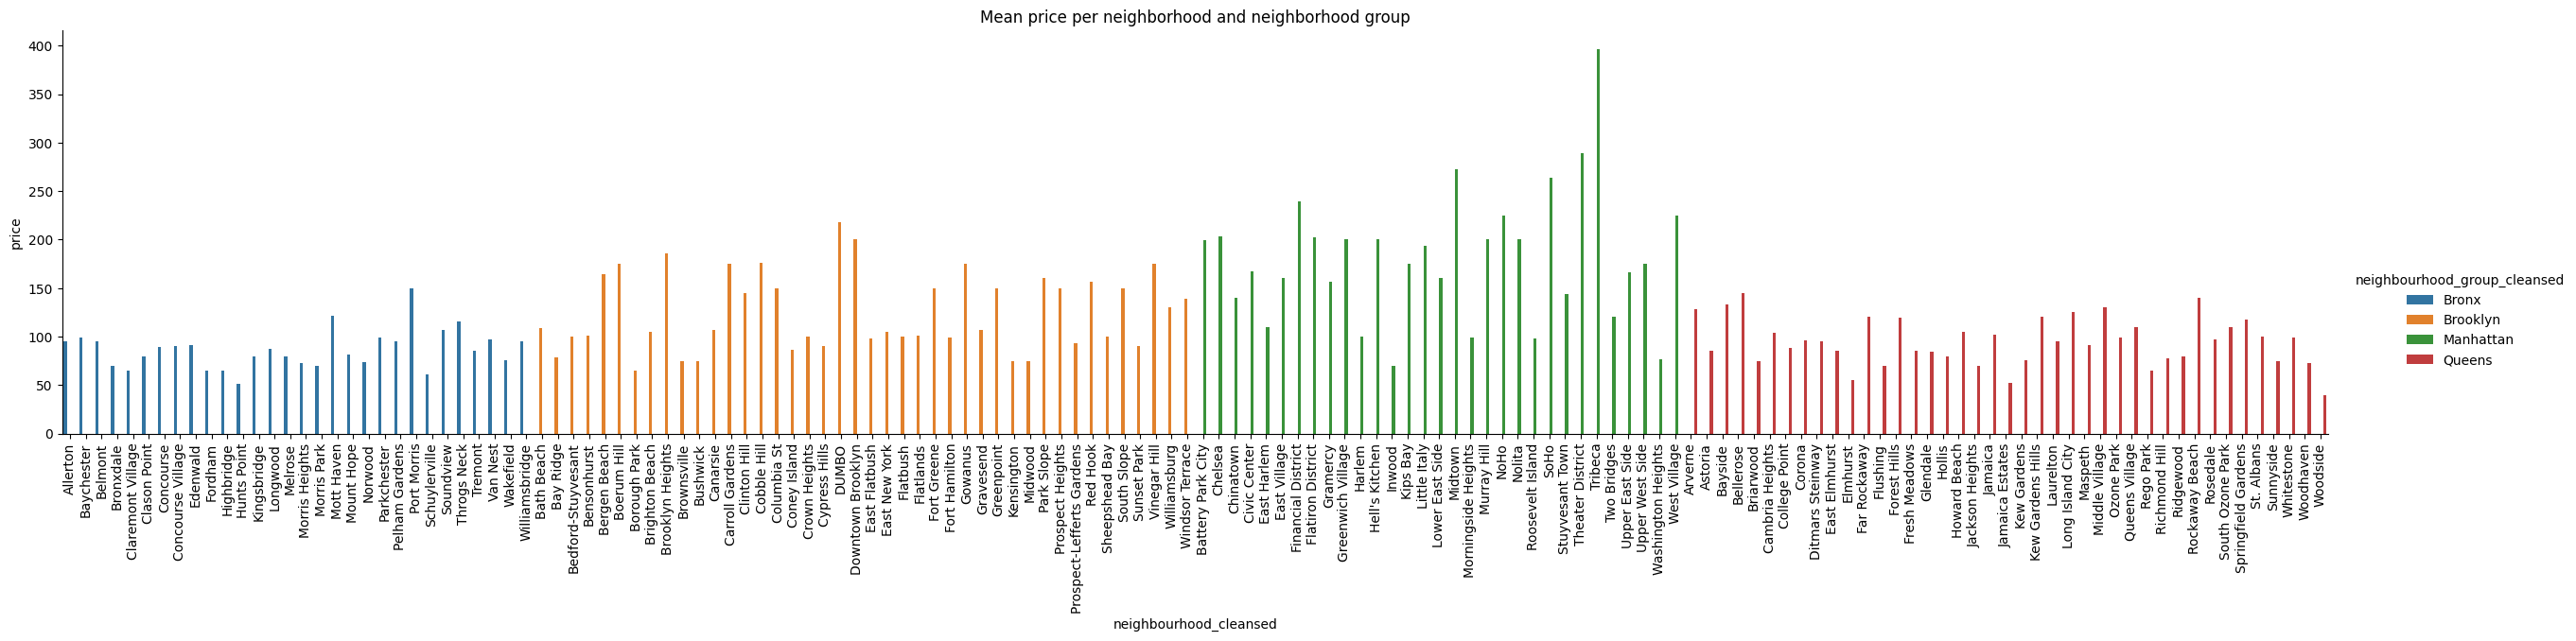

In [451]:
plt.figure(figsize=(12, 8))
grouped_df = df.groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])['price'].median().reset_index()
_ = sns.catplot(x="neighbourhood_cleansed", y="price", hue="neighbourhood_group_cleansed", kind="bar", data=grouped_df, height=5, aspect=5)
plt.xticks(rotation=90);
plt.title("Mean price per neighborhood and neighborhood group");

Here is the world Could presentation of median prices for nirghbourhoods but only for private room types:

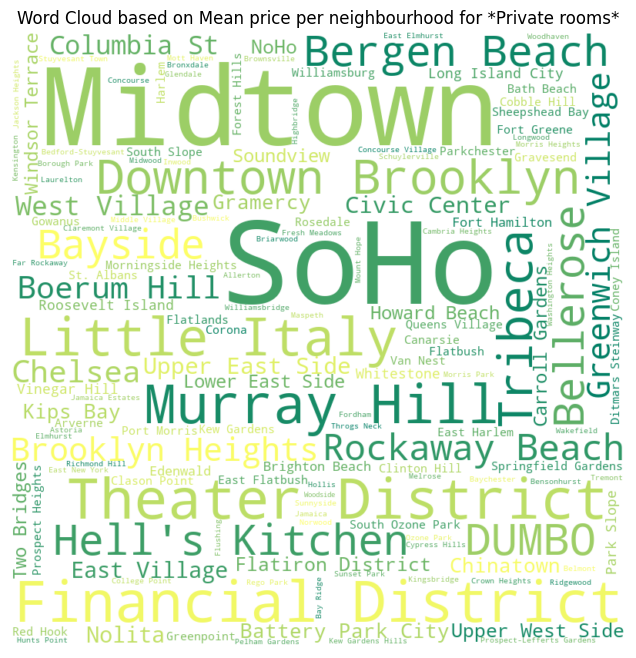

In [458]:
from wordcloud import WordCloud

private_rooms = df[df['room_type'] == 'Private room']
neighborhood_prices = private_rooms.groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])['price'].median().reset_index()

neighborhood_dict = dict(zip(neighborhood_prices.neighbourhood_cleansed, neighborhood_prices.price))



wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='summer', max_font_size=150).generate_from_frequencies(neighborhood_dict)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on Mean price per neighbourhood for *Private rooms*')
plt.show();

# Prediction:

In this section try to use different models to build a prediction model for lisitngs' price. 

Since want to test different encoding and techniques we create a copy or our cleaned:

In [462]:
dataset = df.copy()

Based on what we observed in data exploration step we use these features for prediction (We decide to do not use anenities featues because it does not disperesed properly abd may cause negative effect on the accuracy of price prediction):
* price (As the output of model)
* room_type
* neighbourhood_group
* neighbourhood
* host_is_superhost
* accommodates
* bedrooms
* beds


In [464]:
dataset =  dataset[['price', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']];

for simplicity we rename *neighbourhood_cleansed* and *neghbourhood_group_cleansed* tables:

In [465]:
dataset = dataset.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
dataset = dataset.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'})

### 1- Linear Regression:

In this section we use linear regression model with different encoding types to build price prediction model.

* **combination of ordinal encoding and one-hot encoding**

First we use one-hot encoding to convert the categorical features (room type,  neighbourhood_group, host_is_super_host) to numerical features:

In [466]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ["room_type", "neighbourhood_group", "host_is_superhost"]

# Creating one-hot encoder for categorical features
encoder = OneHotEncoder()
transformer = ColumnTransformer(
    transformers=[("cat", encoder, cat_cols)],
    remainder="passthrough"
)

encoded_cols = transformer.fit_transform(dataset)
feature_names = transformer.get_feature_names_out()  

dataset = pd.DataFrame(encoded_cols, columns=feature_names)


dataset

,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__host_is_superhost_0.0,cat__host_is_superhost_1.0,remainder__price,remainder__neighbourhood,remainder__accommodates,remainder__bedrooms,remainder__beds
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,143.0,Canarsie,2,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,Canarsie,1,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,89.0,Sheepshead Bay,2,3.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,63.0,Flushing,3,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,82.0,Whitestone,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35611,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,450.0,Midtown,2,1.0,1.0
35612,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,Lower East Side,5,2.0,3.0
35613,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,85.0,East Village,1,1.0,1.0
35614,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,208.0,Hell's Kitchen,6,2.0,3.0


then we use mean of each neighbourhood to encode it:

In [467]:
neighbourhood_means = dataset.groupby('remainder__neighbourhood')['remainder__price'].mean()
dataset['neighbourhood_Encoded'] = dataset['remainder__neighbourhood'].map(neighbourhood_means)
dataset

,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__host_is_superhost_0.0,cat__host_is_superhost_1.0,remainder__price,remainder__neighbourhood,remainder__accommodates,remainder__bedrooms,remainder__beds,neighbourhood_Encoded
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,143.0,Canarsie,2,1.0,1.0,125.434109
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,Canarsie,1,1.0,1.0,125.434109
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,89.0,Sheepshead Bay,2,3.0,1.0,142.928058
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,63.0,Flushing,3,1.0,1.0,91.497967
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,82.0,Whitestone,2,1.0,1.0,119.695652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35611,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,450.0,Midtown,2,1.0,1.0,368.618656
35612,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,Lower East Side,5,2.0,3.0,212.442017
35613,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,85.0,East Village,1,1.0,1.0,200.916926
35614,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,208.0,Hell's Kitchen,6,2.0,3.0,267.487008


Now we build the linear regression model and caculate train and test accuracy for it: 

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


y = dataset['remainder__price']
X = dataset.drop(['remainder__neighbourhood', 'remainder__price'], axis=1)
features = [col for col in X]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Fiting a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train, y_train)

# Computing the R^2 score for the training set
y_train_pred = reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

LinearRegression()

R^2 score for training set: 0.4034983624000258
R^2 score for test set: 0.42369951603024003


As the result shoes the accuracy of the linear regression model for price prediction is not good enough. Here we try to use PCA and analyze its effect on the accuracy of the model:

We start with finding and plotting PCAs for our dataset:

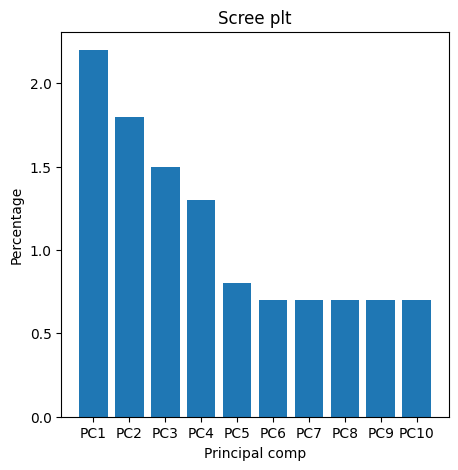

In [491]:
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaled_data = preprocessing.scale(X)  

pca = PCA(n_components=10)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(5, 5))
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show();

Let's see what feature have most participation of PCA1 and PCA2:

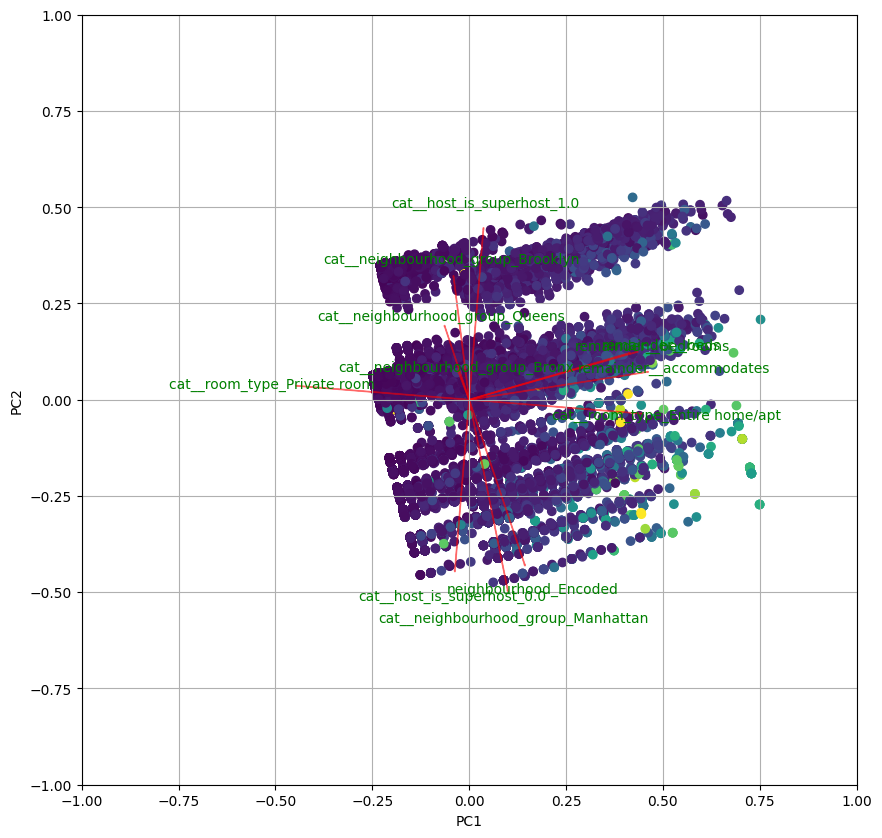

In [477]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(10, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.

myplot(pca_data,np.transpose(pca.components_),features)
plt.show();

Lets see what is the effect of using PCA for linear regression:

In [485]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

LinearRegression()

R^2 score for training set: 0.4035320755574746
R^2 score for test set: 0.4239217350563893


The result shows that even PCA technique can not increase the linear regression model accuracy.

* **Just one-hot encoding**

Here we use one-hot encoding for all the categorical features and use linear regression for prediction. We also analyze using PCA on model accuracy:

- Without PCA

In [498]:
dataset = df.copy()

#filtering our needed features
dataset =  dataset[['price', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']];
#Renaming to a simpler name
dataset = dataset.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
dataset = dataset.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'})

#one-hot encoding
room_type_cols = pd.get_dummies(dataset['room_type'])
dataset = dataset.merge(room_type_cols,left_index=True,right_index=True) # or concat(axis=1)
#one-hot encoding
neighbourhood_group_cols = pd.get_dummies(dataset['neighbourhood_group'])
dataset = dataset.merge(neighbourhood_group_cols,left_index=True,right_index=True) # or concat(axis=1)
#one-hot encoding
neighbourhood_cols = pd.get_dummies(dataset['neighbourhood'])
dataset = dataset.merge(neighbourhood_cols,left_index=True,right_index=True) # or concat(axis=1)

y = dataset['price']

#droping price and categorical columns
X = dataset.drop(['price', 'room_type', 'neighbourhood', 'neighbourhood_group'], axis=1)
features = [col for col in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

LinearRegression()

R^2 score for training set: 0.4042202808976444
R^2 score for test set: 0.42093120345530555


- With PCA

n_components=20

In [499]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

LinearRegression()

R^2 score for training set: 0.2793120071574344
R^2 score for test set: 0.2766703711504973


n_components=154 (maximum vlaue)

In [497]:
pca = PCA(n_components=154)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

LinearRegression()

R^2 score for training set: 0.40971089620777246
R^2 score for test set: 0.4257116317672843


with small vlaue for n_components the accuracy decreases. 

The ont-hot encoding or label ncoding of categorical features does not make big differences on the model accuracy

### 2- decision Tree and Random Forest:

In this section we firt use decision tree model and then random forest model and compare them.

* **Decision Tree:**

In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


dataset = df.copy()

#filtering our needed features
dataset =  dataset[['price', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']]
#Renaming to a simpler name
dataset = dataset.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
dataset = dataset.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'})

#numberical features list
num_features = ['price', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']


#categorical features list
cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

encoder = LabelEncoder()

X_cat = dataset[cat_features]

for feature in cat_features:
    encoder.fit(dataset[feature])
    X_cat[feature] = encoder.transform(dataset[feature])


encoded_data = pd.concat([pd.DataFrame(X_cat), dataset[num_features]], axis=1)

X = encoded_data.drop(['price'], axis = 1)
y = encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


print("R^2 score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))


LabelEncoder()

LabelEncoder()

LabelEncoder()

DecisionTreeRegressor(max_depth=5, random_state=42)

R^2 score: 0.3987613734542126
Mean squared error: 19772.712364813422


* **Random Forest:**

In [512]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

RandomForestRegressor(random_state=42)

R^2 score: 0.46761721670529366


The result shows that for this dataset the Random forest method has better performance than the Descision Tree method.

### 2- SVM:

In this section we firt use decision tree model and then random forest model and compare them.

* **Decision Tree:**

In this part we use PCA and SVM to predict price:

SVC(C=100, gamma='auto')

n_comp:  10


SVC(C=100, gamma='auto')

n_comp:  20


SVC(C=100, gamma='auto')

n_comp:  50


SVC(C=100, gamma='auto')

n_comp:  100


SVC(C=100, gamma='auto')

n_comp:  150


Text(0.5, 0, 'Number of PCA components')

Text(0, 0.5, 'R^2 score')

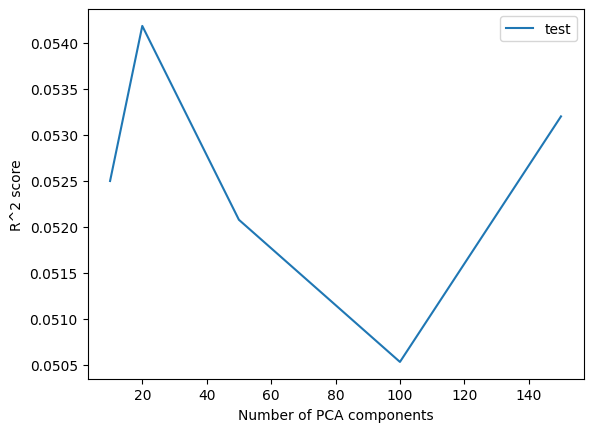

In [513]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


dataset = df.copy()

#filtering our needed features
dataset =  dataset[['price', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']];
#Renaming to a simpler name
dataset = dataset.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
dataset = dataset.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'})

#one-hot encoding
room_type_cols = pd.get_dummies(dataset['room_type'])
dataset = dataset.merge(room_type_cols,left_index=True,right_index=True) # or concat(axis=1)
#one-hot encoding
neighbourhood_group_cols = pd.get_dummies(dataset['neighbourhood_group'])
dataset = dataset.merge(neighbourhood_group_cols,left_index=True,right_index=True) # or concat(axis=1)
#one-hot encoding
neighbourhood_cols = pd.get_dummies(dataset['neighbourhood'])
dataset = dataset.merge(neighbourhood_cols,left_index=True,right_index=True) # or concat(axis=1)

y = dataset['price']

#droping price and categorical columns
X = dataset.drop(['price', 'room_type', 'neighbourhood', 'neighbourhood_group'], axis=1)
features = [col for col in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_pca_components = [10, 20, 50, 100, 150]

scores = []

for n_comp in n_pca_components:

    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model=SVC(C=100,gamma='auto',kernel='rbf')
    model.fit(X_train_pca,y_train)
    y_pred=model.predict(X_test_pca)
    scores.append(accuracy_score(y_test,y_pred))
    print('n_comp: ', n_comp)

plt.plot(n_pca_components, scores, label='test')
plt.xlabel('Number of PCA components')
plt.ylabel('R^2 score')
plt.legend()

Here we summarize the results for different models:

In [13]:
results = {'Linear Regression w/o PCA': 0.42,
           'Linear Regression with PCA (n_comp = maximum)': 0.42,
           'Linear Regression with PCA (n_comp = 20)' : 0.28,
            'Descision Tree' : 0.4,
            'Random Forest' : 0.46,
            'SVM' : 5}

from tabulate import tabulate


headers = ['Method', 'R^2 Score']
rows = []
for key, value in results.items():
    rows.append([key, value])

print(tabulate(rows, headers=headers))

Method                                           R^2 Score
---------------------------------------------  -----------
Linear Regression w/o PCA                             0.42
Linear Regression with PCA (n_comp = maximum)         0.42
Linear Regression with PCA (n_comp = 20)              0.28
Descision Tree                                        0.4
Random Forest                                         0.46
SVM                                                   5


The result shows that the most successful method for price prediction on NYC Airbnb is *Randon Forest* model. but, averally, the final accuracy is not good for none of the models. The main reason is that the features we have in this dataset can not successfully describe the price distribtion and there are some other factors which are important for Airbnb price prediction like *Listing size*, *Age of listing* and *Furnitures*(amenities column is too incomplete to use it for prediction).